<a href="https://colab.research.google.com/github/andheartsjaz/Public/blob/master/SVM_DRB_vs_RBF_Day_33_Lecture_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day 33 Lecture 2 Assignment

In this assignment, we will learn about non linear SVM models. We will use the heart disease dataset loaded below and analyze the model generated for this dataset.

In [0]:

import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from mlxtend.plotting import plot_decision_regions

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
heart = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/framingham_heart_disease.csv')

In [0]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


This dataset helps us predict the probability of coronary heart diease (CHD) in the next 10 years given the risk factors for each subject in the study. Our target variable is `TenYearCHD`.

We'll start off by removing any rows containing missing data.

In [0]:
# answer below:

missing = pd.DataFrame(heart.isnull().sum() * 100 / len(heart), columns=["Missing Values %"])
missing = missing.sort_values(by="Missing Values %", ascending=False)

heart = heart.dropna(axis=1, how='any')

Finally, we wil split the data into train and test with 20% of the data in the test subset.

In [0]:
# answer below:
X = heart.drop(columns='TenYearCHD')
y = heart.TenYearCHD
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

We will then scale the data using the standard scaler. Do this in the cell below.

In [0]:
# answer below:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

C:\Users\jvicc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jvicc\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jvicc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
# We would like to compare the runtime of a number of functions later in our code. 

Generate a polynomial SVC model and a RBF SVC model. Compare the score for the two models on the test data and also compare the runtime of the two models.

C:\Users\jvicc\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


Train score: 0.8536873156342183
Test score: 0.8549528301886793


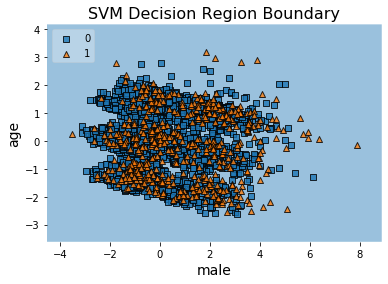

In [0]:
svm = SVC(kernel='poly')
svm.fit(X_train_scaled, y_train)


from sklearn.decomposition import PCA

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train_scaled)
clf.fit(X_train2, y_train)


plot_decision_regions(X_train2, 
                      y_train.values, 
                      clf=clf,
#                       scatter_kwargs={'alpha': 0.01},
                      legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


print(f'Train score: {svm.score(X_train_scaled, y_train)}')
print(f'Test score: {svm.score(X_test_scaled, y_test)}')

# plot_decision_regions(X_train_scaled, y_train.values, clf=svm, 
#                       scatter_kwargs={'alpha': 0.05})
# plt.show()

C:\Users\jvicc\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


Train score: 0.8525073746312685
Test score: 0.8549528301886793


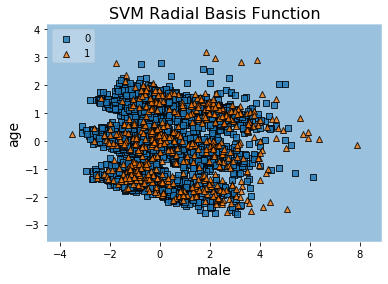

In [0]:
# answer below:

svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)


from sklearn.decomposition import PCA

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train3 = pca.fit_transform(X_train_scaled)
clf.fit(X_train3, y_train)


plot_decision_regions(X_train3, 
                      y_train.values, 
                      clf=clf,
#                       scatter_kwargs={'alpha': 0.01},
                      legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Radial Basis Function', size=16)



print(f'Train score: {svm.score(X_train_scaled, y_train)}')
print(f'Test score: {svm.score(X_test_scaled, y_test)}')

# plot_decision_regions(X_train_scaled, y_train.values, clf=svm, 
#                       scatter_kwargs={'alpha': 0.05})
plt.show()



Which model overfits more? Why? How would you improve the model that overfits more?

In [0]:
# answer below:

Our first model, the polynomial SVM model, had results of:
> Train score: 0.8536873156342183
>  Test score: 0.8549528301886793

Our second model, the radial basis function SVM model,  had results of:
> Train score: 0.8525073746312685
>  Test score: 0.8549528301886793

given how close the scores are, I would say these are not overfit, but I would say the polynomial SVM model might be more prone to overfitting, but we are unsure at this time. 

